In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_frame = pd.read_csv("data/diabetes.csv", header=None)
data_frame.describe()

,0,1,2,3,4,5,6,7,8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087928,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
y_data = np.array(data_frame[8])
del data_frame[8]

x_data = np.array(data_frame)

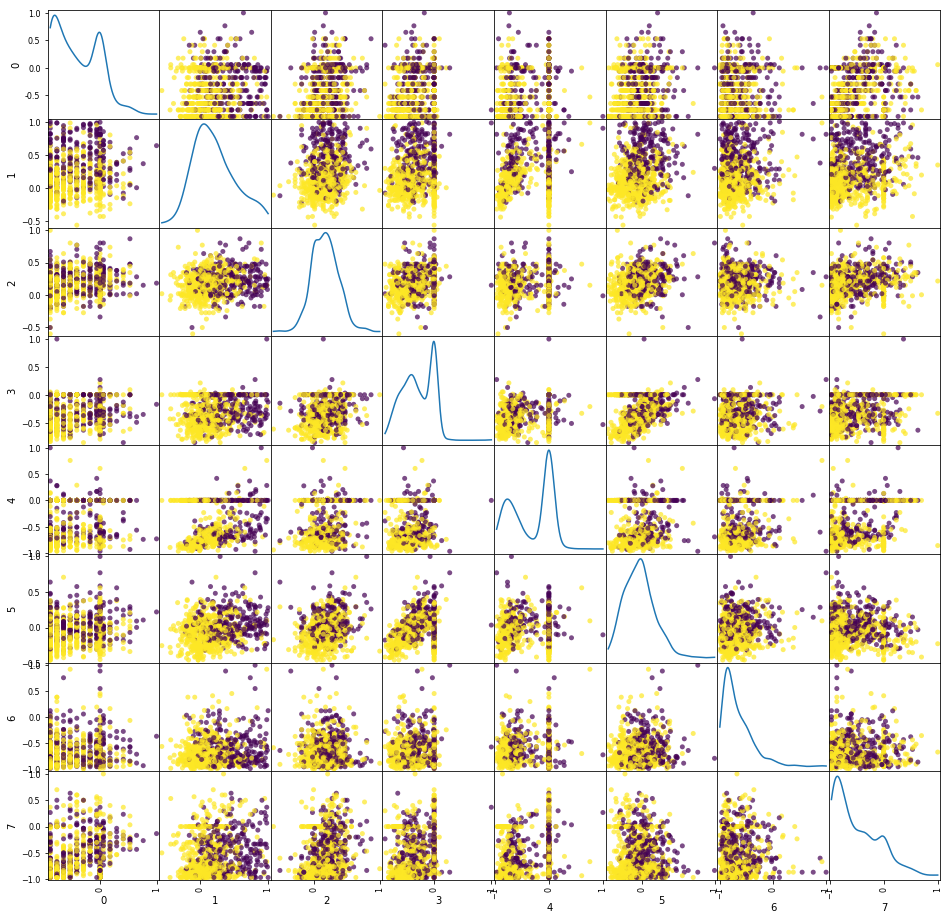

In [4]:
_ = scatter_matrix(pd.DataFrame(x_data), alpha=0.7,
                   c=y_data, s=100, figsize=(16,16), diagonal="kde")

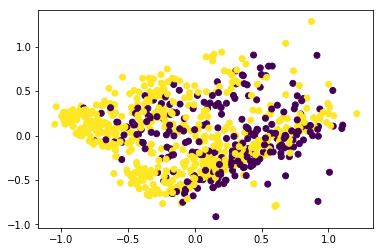

In [5]:
pca_result = PCA(2).fit_transform(x_data)

plt.scatter(pca_result[:,0], pca_result[:,1], c = y_data)

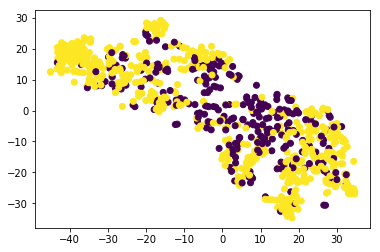

In [6]:
tsne_result = TSNE(n_components=2, init='pca').fit_transform(x_data)

plt.scatter(tsne_result[:,0], tsne_result[:,1], c = y_data)

----------------

In [7]:
# 학습데이터와 테스트데이터 구분(비율 7:3)
x_train, x_test, y_train, y_test = \
train_test_split(x_data, y_data, test_size=0.3, random_state=777)

Step : 1000, Cost : 0.677
Step : 2000, Cost : 0.637
Step : 3000, Cost : 0.612
Step : 4000, Cost : 0.569
Step : 5000, Cost : 0.509
Step : 6000, Cost : 0.462
Step : 7000, Cost : 0.436
Step : 8000, Cost : 0.418
Step : 9000, Cost : 0.403
Step : 10000, Cost : 0.392


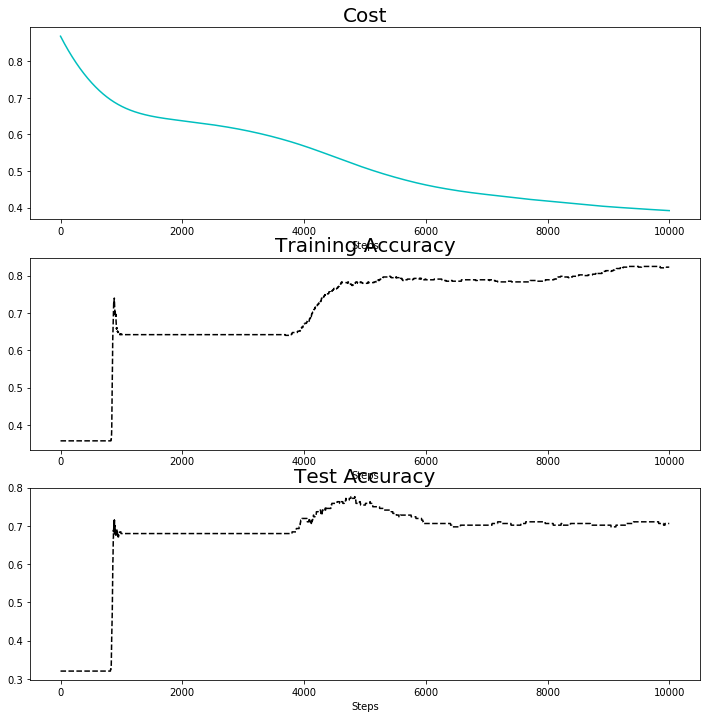

In [8]:
# MLP 모델 구성
X = tf.placeholder(tf.float32, shape=[None,8])
Y = tf.placeholder(tf.float32, shape=[None,1])

H0 = tf.layers.dense(X, 8, activation=tf.nn.relu)
H1 = tf.layers.dense(H0, 8, activation=tf.nn.sigmoid)
H2 = tf.layers.dense(H1, 8, activation=tf.nn.sigmoid)

H = tf.layers.dense(H2, 1, activation=tf.nn.sigmoid)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))

gradients, _ = tf.clip_by_global_norm(tf.gradients(loss, tf.trainable_variables()), 5)
optimizer = tf.train.AdamOptimizer(0.0001)
train = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []
acc__list = []


iteration = 10000
for step in range(iteration):
    cost, _, acc_ = sess.run([loss,  train, accuracy], feed_dict={X: x_train, Y: y_train.reshape((-1,1))})
    acc = sess.run( accuracy, feed_dict={X: x_test, Y: y_test.reshape((-1,1))})
    cost_list.append(cost)
    acc_list.append(acc)
    acc__list.append(acc_)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %0.3f" %(step+1, cost))

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.xlabel("Steps")
plt.title("Cost", fontsize=20)
_ = plt.plot(cost_list, "c")

plt.subplot(312)
plt.xlabel("Steps")
plt.title("Training Accuracy", fontsize=20)
_ = plt.plot(acc__list, "k--")

plt.subplot(313)
plt.xlabel("Steps")
plt.title("Test Accuracy", fontsize=20)
_ = plt.plot(acc_list, "k--")